# Integratore

In [10]:
import pandas as pd
from utilities import * # My functions: pair_dat_err, uncertainties_to_root_graph_errors
from uncertainties import umath
import ROOT

ModuleNotFoundError: No module named 'utilities'

# Gain 1

### Read DataFrames

In [9]:
df_data = pd.read_csv("../data-source/5-10-21/integratore/data.csv")
df_errors = pd.read_csv("../data-source/5-10-21/integratore/errors.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../data-source/5-10-21/integratore/data.csv'

### Convert to arrays of uncertainties

In [4]:
f_arr = pair_dat_err(df_data['f'], df_errors['f'])
ppch1_arr = pair_dat_err(df_data['PPch1'], df_errors['PPch1'])
ppch2_arr = pair_dat_err(df_data['PPch2'], df_errors['PPch2'])

### Calculate Gain

In [5]:
gains_arr = ppch2_arr / ppch1_arr
db_gains_arr = list(map(lambda x: 20 * umath.log(x), gains_arr))

### Canvas

In [12]:
canvas = ROOT.TCanvas("c1", "non inverting gain 1", 1000, 500)

canvas.SetLogx(True)

### GraphErrors

In [13]:
#bode_graph_err = uncertainties_to_root_graph_errors(f_arr, gains_arr)
bode_graph_err = uncertainties_to_root_graph_errors(f_arr, db_gains_arr)

bode_graph_err.SetTitle("Non Inverting Gain 1")
bode_graph_err.GetXaxis().SetTitle("f [Hz]")
bode_graph_err.GetYaxis().SetTitle("G [dB]")
bode_graph_err.SetMarkerStyle(21)
bode_graph_err.SetMarkerSize(0.4)

### Fit [TODO]

In [14]:
#function = ""
#fit_f = ROOT.TF1("fit1", function)

In [15]:
#fit_f.SetLineColor(4)

In [16]:
#fit_f.SetParName(0, "")
#fit_f.SetParameter(0, 0)

### Draw

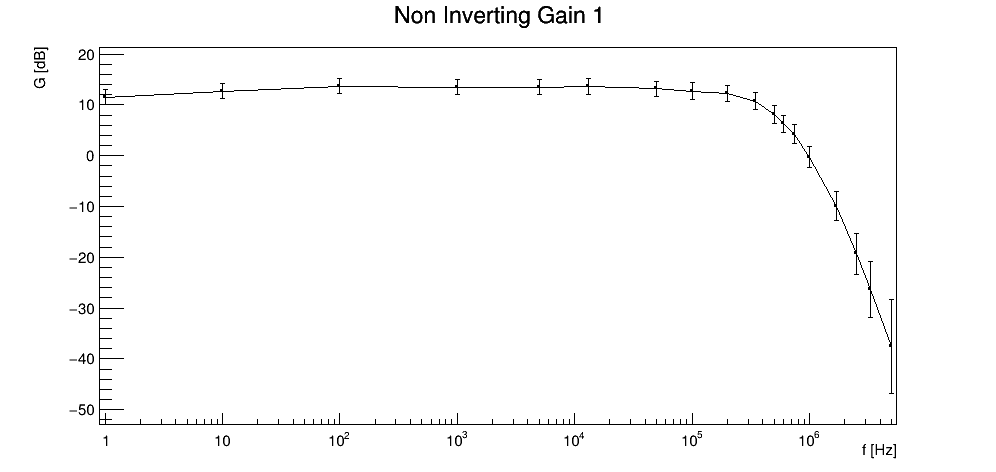

In [17]:
canvas.Draw()
bode_graph_err.Draw()
#bode_graph_err.Fit(fit_f, "MSE")